<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%2099%3A%20Image%20Captioning%20with%20Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

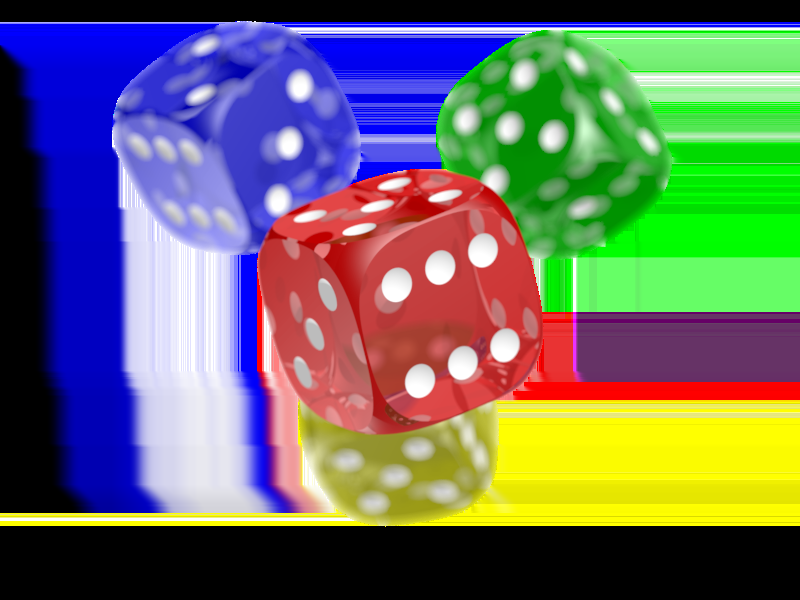


📝 Generated Caption: two dice with one red and one green


In [4]:
# Install library yang diperlukan
!pip install transformers torch pillow requests

# Impor library
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Muat model dan processor BLIP
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# Pilih gambar (URL atau unggah ke Colab)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"  # Contoh gambar

# Muat gambar
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")

# Proses gambar dan buat caption
inputs = processor(images=image, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

# Tampilkan gambar dan caption
display(image)
print("\n📝 Generated Caption:", caption)